In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
import pandas as pd
import plotly.graph_objects as go
import numpy as np

df = pd.read_csv('diabetes.csv')



In [5]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']


In [6]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [7]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [8]:
y_scores = model.predict_proba(X_test)[:,1]


In [9]:
y_scores[:5]

array([0.04954489, 0.17457207, 0.09363396, 0.25509104, 0.63549082])

In [11]:

fpr, tpr, thresholds = roc_curve(y_test, y_scores)

In [12]:
fpr

array([0.        , 0.        , 0.        , 0.00917431, 0.00917431,
       0.02752294, 0.02752294, 0.0733945 , 0.0733945 , 0.08256881,
       0.08256881, 0.09174312, 0.09174312, 0.10091743, 0.10091743,
       0.11009174, 0.11009174, 0.12844037, 0.12844037, 0.14678899,
       0.14678899, 0.1559633 , 0.1559633 , 0.17431193, 0.17431193,
       0.18348624, 0.18348624, 0.22018349, 0.22018349, 0.30275229,
       0.30275229, 0.35779817, 0.35779817, 0.39449541, 0.39449541,
       0.40366972, 0.40366972, 0.42201835, 0.42201835, 0.53211009,
       0.53211009, 0.5412844 , 0.5412844 , 0.57798165, 0.57798165,
       0.63302752, 0.63302752, 0.66055046, 0.66055046, 0.74311927,
       0.74311927, 0.98165138, 0.98165138, 1.        ])

In [13]:
thresholds

array([1.99355859e+00, 9.93558591e-01, 9.52633303e-01, 9.52456767e-01,
       8.24688153e-01, 7.68804418e-01, 7.61962183e-01, 6.83818013e-01,
       6.75247133e-01, 6.74199053e-01, 6.51194657e-01, 6.50858090e-01,
       6.35490822e-01, 5.86310753e-01, 5.75585292e-01, 5.69747421e-01,
       5.25144786e-01, 4.70140099e-01, 4.61361141e-01, 4.50413105e-01,
       4.39089595e-01, 4.38668620e-01, 4.22334652e-01, 4.19890841e-01,
       4.13052190e-01, 4.11998960e-01, 4.04754027e-01, 3.79686494e-01,
       3.68677999e-01, 3.10246497e-01, 3.08807100e-01, 2.77741276e-01,
       2.72037489e-01, 2.55111023e-01, 2.55091039e-01, 2.47414061e-01,
       2.45470777e-01, 2.36651186e-01, 2.28899778e-01, 1.81862857e-01,
       1.78618411e-01, 1.74572071e-01, 1.73275977e-01, 1.46407068e-01,
       1.40754008e-01, 1.16729163e-01, 1.14949664e-01, 1.10029450e-01,
       1.06680562e-01, 8.92404152e-02, 8.67342538e-02, 2.00251114e-02,
       1.93285891e-02, 1.60889748e-03])

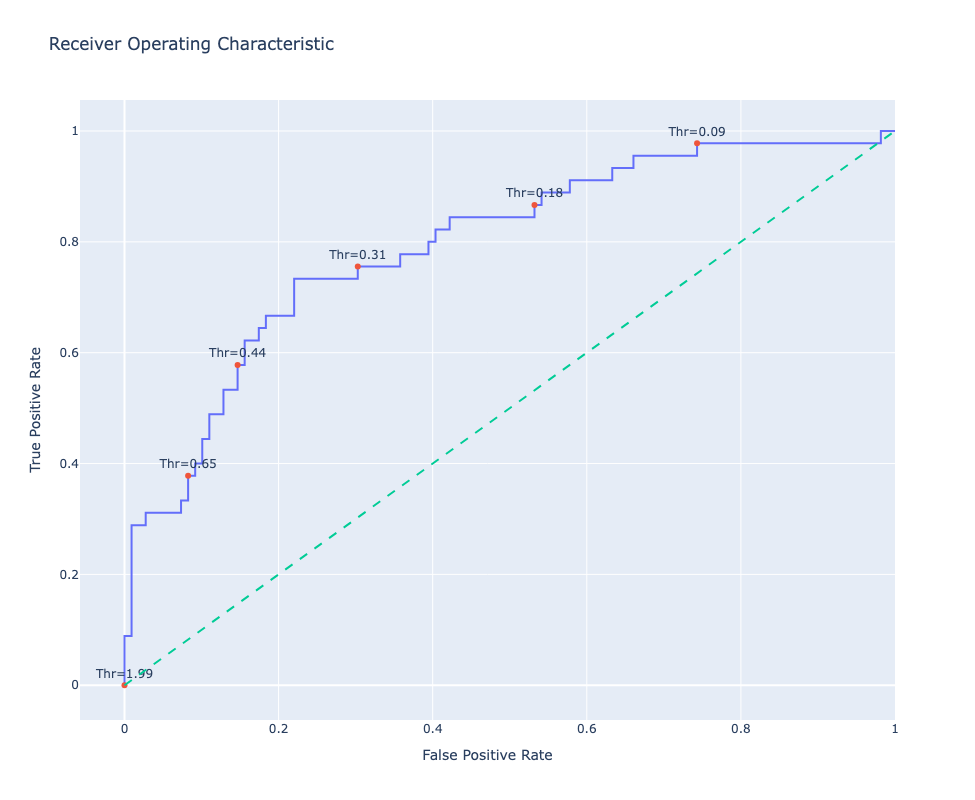

In [17]:


# Generate a trace for ROC curve
trace0 = go.Scatter(
    x=fpr,
    y=tpr,
    mode='lines',
    name='ROC curve'
)

# Only label every nth point to avoid cluttering
n = 10  
indices = np.arange(len(thresholds)) % n == 0  # Choose indices where index mod n is 0

trace1 = go.Scatter(
    x=fpr[indices], 
    y=tpr[indices], 
    mode='markers+text', 
    name='Threshold points', 
    text=[f"Thr={thr:.2f}" for thr in thresholds[indices]], 
    textposition='top center'
)


# Diagonal line
trace2 = go.Scatter(
    x=[0, 1], 
    y=[0, 1], 
    mode='lines', 
    name='Random (Area = 0.5)', 
    line=dict(dash='dash')
)

data = [trace0, trace1, trace2]

# Define layout with square aspect ratio
layout = go.Layout(
    title='Receiver Operating Characteristic',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    autosize=False,
    width=800,
    height=800,
    showlegend=False
)

# Define figure and add data
fig = go.Figure(data=data, layout=layout)

# Show figure
fig.show()


In [19]:
# Assume that fpr, tpr, thresholds have already been calculated
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("optimal threshold is:", optimal_threshold)

optimal threshold is: 0.3686779990460824
